In [1]:
from sympy import symbols
from sympy.physics.mechanics import *
from sympy.physics.vector import init_vprinting, vpprint, vprint, vlatex

init_vprinting(use_latex='mathjax', pretty_print=False)

In [2]:
from sympy.physics.mechanics import inertia, RigidBody
from matplotlib.pyplot import *
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
N = ReferenceFrame('N')  
B = ReferenceFrame('B')  
C = ReferenceFrame('C')  
D = ReferenceFrame('D') 

In [4]:
No = Point('No')
Bcm = Point('Bcm') 
M1 = Point('M1')    
M2 = Point('M2')
M3 = Point('M3')
M4 = Point('M4')

In [5]:
x, y, z, xdot, ydot, zdot = dynamicsymbols('x y z xdot ydot zdot')
phi, theta, psi, p, q, r = dynamicsymbols('phi theta psi p q r')

In [6]:
xd, yd, zd, xdotd, ydotd, zdotd = dynamicsymbols('x y z xdot ydot zdot', 1)
phid, thetad, psid, pd, qd, rd = dynamicsymbols('phi theta psi p q r', 1)

In [7]:
mB, g, dxm, dym, dzm, IBxx, IByy, IBzz = symbols('mB g dxm dym dzm IBxx IByy IBzz')
ThrM1, ThrM2, ThrM3, ThrM4, TorM1, TorM2, TorM3, TorM4 = symbols('ThrM1 ThrM2 ThrM3 ThrM4 TorM1 TorM2 TorM3 TorM4')

In [8]:
D.orient(N, 'Axis', [psi, N.z])
C.orient(D, 'Axis', [theta, D.y])
B.orient(C, 'Axis', [phi, C.x])


In [9]:
No.set_vel(N, 0)

In [10]:
Bcm.set_pos(No, x*N.x + y*N.y + z*N.z)
Bcm.set_vel(N, Bcm.pos_from(No).dt(N))

In [11]:
M1.set_pos(Bcm,  dxm*B.x - dym*B.y - dzm*B.z)
M2.set_pos(Bcm,  dxm*B.x + dym*B.y - dzm*B.z)
M3.set_pos(Bcm, -dxm*B.x + dym*B.y - dzm*B.z)
M4.set_pos(Bcm, -dxm*B.x - dym*B.y - dzm*B.z)
M1.v2pt_theory(No, N, B)
M2.v2pt_theory(No, N, B)
M3.v2pt_theory(No, N, B)
M4.v2pt_theory(No, N, B)

(-(-sin(theta)*phi' + psi')*y + (sin(psi)*cos(theta)*phi' + cos(psi)*theta')*z)*N.x + (-(-sin(psi)*theta' + cos(psi)*cos(theta)*phi')*z + (-sin(theta)*phi' + psi')*x)*N.y + ((-sin(psi)*theta' + cos(psi)*cos(theta)*phi')*y - (sin(psi)*cos(theta)*phi' + cos(psi)*theta')*x)*N.z + (dym*(-sin(phi)*theta' + cos(phi)*cos(theta)*psi') - dzm*(sin(phi)*cos(theta)*psi' + cos(phi)*theta'))*B.x + (-dxm*(-sin(phi)*theta' + cos(phi)*cos(theta)*psi') + dzm*(-sin(theta)*psi' + phi'))*B.y + (dxm*(sin(phi)*cos(theta)*psi' + cos(phi)*theta') - dym*(-sin(theta)*psi' + phi'))*B.z

In [12]:
M1.pos_from(No).express(N).simplify()

(dxm*cos(psi)*cos(theta) - dym*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) - dzm*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi)) + x)*N.x + (dxm*sin(psi)*cos(theta) - dym*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) + dzm*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi)) + y)*N.y + (-dxm*sin(theta) - dym*sin(phi)*cos(theta) - dzm*cos(phi)*cos(theta) + z)*N.z

In [13]:
M2.pos_from(No).express(N).simplify()

(dxm*cos(psi)*cos(theta) + dym*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) - dzm*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi)) + x)*N.x + (dxm*sin(psi)*cos(theta) + dym*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) + dzm*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi)) + y)*N.y + (-dxm*sin(theta) + dym*sin(phi)*cos(theta) - dzm*cos(phi)*cos(theta) + z)*N.z

In [14]:
IB = inertia(B, IBxx, IByy, IBzz)
IBc= (IB,Bcm)

BodyB = RigidBody('BodyB', Bcm, B, mB, IBc)
BodyList = [BodyB]

In [15]:
Grav_Force = (Bcm, mB*g*B.z)
FM1 = (M1, -ThrM1*B.z)
FM2 = (M2, -ThrM2*B.z)
FM3 = (M3, -ThrM3*B.z)
FM4 = (M4, -ThrM4*B.z)

TM1 = (B, -TorM1*B.z)
TM2 = (B,  TorM2*B.z)
TM3 = (B, -TorM3*B.z)
TM4 = (B,  TorM4*B.z)
ForceList = [Grav_Force, FM1, FM2, FM3, FM4, TM1, TM2, TM3, TM4]

In [16]:
# Kinematic Differential Equations
# ---------------------------
kd = [xdot - xd, 
      ydot - yd,
      zdot - zd,
      p - phid,
      q - thetad,
      r - psid]
kd

[xdot - x', ydot - y', zdot - z', p - phi', q - theta', r - psi']

In [17]:
from sympy import trigsimp
from sympy.physics.mechanics import KanesMethod

In [18]:
from sympy import simplify

In [19]:
kane = KanesMethod(N, q_ind=[x, y, z, phi, theta, psi], u_ind=[xdot, ydot, zdot, p, q, r], kd_eqs=kd)
(fr, frstar) = kane.kanes_equations(BodyList, ForceList)

In [20]:
trigsimp(fr + frstar)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [21]:
mass_matrix = trigsimp(kane.mass_matrix_full)
mass_matrix

Matrix([
[1, 0, 0, 0, 0, 0,  0,  0,  0,                0,                                          0,                                                                                    0],
[0, 1, 0, 0, 0, 0,  0,  0,  0,                0,                                          0,                                                                                    0],
[0, 0, 1, 0, 0, 0,  0,  0,  0,                0,                                          0,                                                                                    0],
[0, 0, 0, 1, 0, 0,  0,  0,  0,                0,                                          0,                                                                                    0],
[0, 0, 0, 0, 1, 0,  0,  0,  0,                0,                                          0,                                                                                    0],
[0, 0, 0, 0, 0, 1,  0,  0,  0,                0,                                          0

In [22]:
forcing_vector = trigsimp(kane.forcing_full)
simplify(forcing_vector)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [23]:
from numpy import deg2rad, rad2deg, array, zeros, linspace
from scipy.integrate import odeint

In [24]:
from pydy.codegen.ode_function_generators import generate_ode_function

C:\Users\Mahdi\anaconda3\lib\site-packages\sympy\printing\ccode.py:8: SymPyDeprecationWarning: 

importing from sympy.printing.ccode has been deprecated since SymPy
1.7. Use Import from sympy.printing.c instead. See
https://github.com/sympy/sympy/issues/20256 for more info.

  SymPyDeprecationWarning(


In [25]:
%matplotlib inline

In [26]:
from matplotlib.pyplot import plot, legend, xlabel, ylabel, rcParams

In [27]:
coordinates = [x, y, z, phi, theta, psi]
coordinates

[x, y, z, phi, theta, psi]

In [28]:
speeds = [xdot, ydot, zdot, p, q, r]
speeds

[xdot, ydot, zdot, p, q, r]

In [29]:
constants= [mB,
            g,
            dxm,
            dym,
            dzm,
            IBxx,
            IByy,
            IBzz,
           ]
constants

[mB, g, dxm, dym, dzm, IBxx, IByy, IBzz]

In [30]:
specified= [ThrM1, 
            ThrM2,
            ThrM3,
            ThrM4, 
            TorM1,
            TorM2,
            TorM3,
            TorM4]


In [31]:
right_hand_side = generate_ode_function(forcing_vector, coordinates,
                                        speeds, constants,
                                        mass_matrix= mass_matrix,
                                        specifieds=specified)

In [32]:
x0 = zeros(12)
x0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
x0[:8] = deg2rad(2.0)
x0

array([0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.        , 0.        ,
       0.        , 0.        ])

In [34]:
numerical_constants = array([1.8,
                             9.81,
                             0.145,
                             0.145,
                             0.05,
                             0.00706,
                             0.00706,
                             0.007865,]
                            ) 

In [35]:
numerical_specified = zeros(8)

args = {'constants': numerical_constants,
        'specified': numerical_specified}

frames_per_sec = 60
final_time = 10
t = linspace(0, final_time, final_time * frames_per_sec)

In [36]:
right_hand_side(x0, 0.0, numerical_specified, numerical_constants)

array([ 0.03490659,  0.03490659,  0.        ,  0.        ,  0.        ,
        0.        ,  0.35389541, -0.33021445,  9.79805167,  0.        ,
        0.        ,  0.        ])

In [37]:
y = odeint(right_hand_side, x0, t, args=(numerical_specified, numerical_constants))

In [38]:
y.shape

(600, 12)

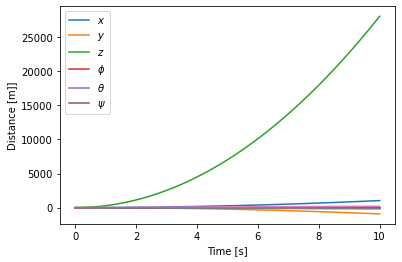

In [39]:
plot(t, rad2deg(y[:, :8]))
xlabel('Time [s]')
ylabel('Distance [m]]')
legend(["${}$".format(vlatex(c)) for c in coordinates])

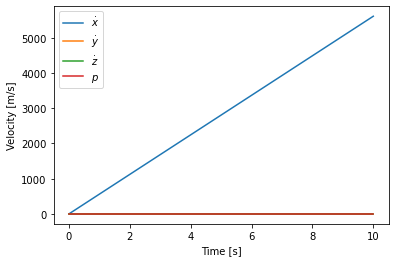

In [40]:
plot(t, rad2deg(y[:, 8:]))
xlabel('Time [s]')
ylabel('Velocity [m/s]')
legend(["${}$".format(vlatex(s)) for s in speeds])

In [41]:
from pydy.viz.shapes import Cylinder, Sphere
import pydy.viz
pydy.viz.shapes.__all__

['Cube',
 'Cylinder',
 'Cone',
 'Sphere',
 'Circle',
 'Plane',
 'Tetrahedron',
 'Octahedron',
 'Icosahedron',
 'Torus',
 'TorusKnot',
 'Tube']

In [42]:
from pydy.viz.visualization_frame import VisualizationFrame
from pydy.viz.scene import Scene

In [43]:
Bcm_shape = Sphere(color='black', radius=0.05)
M1_shape = Sphere(color='black', radius=0.05)
M2_shape = Sphere(color='black', radius=0.05)
M3_shape = Sphere(color='black', radius=0.05)
M4_shape = Sphere(color='black', radius=0.05)

In [44]:
Bcm_viz_frame = VisualizationFrame(N, Bcm, Bcm_shape)
M1_viz_frame = VisualizationFrame(N, M1, M1_shape)
M2_viz_frame = VisualizationFrame(N, M2, M2_shape)
M3_viz_frame = VisualizationFrame(N, M3, M3_shape)
M4_viz_frame = VisualizationFrame(N, M4, M4_shape)

In [45]:
Body_center = Point('B_c')
M_1_center = Point('M_c1')
M_2_center = Point('M_c2')
M_3_center = Point('M_c3')
M_4_center = Point('M_c4')

In [46]:
Body_center.set_pos(Bcm, Bcm.pos_from(No)) 

In [47]:
constants_dict = dict(zip(constants, numerical_constants))
constants_dict

{IBxx: 0.00706, IByy: 0.00706, IBzz: 0.007865, dxm: 0.145, dym: 0.145, dzm: 0.05, g: 9.81, mB: 1.8}

In [48]:
scene = Scene(N, No)

In [49]:
scene.visualization_frames = [
                              Bcm_viz_frame,
                              M1_viz_frame,
                              M2_viz_frame,
                              M3_viz_frame,
                              M4_viz_frame,
                             ]

In [50]:
scene.states_symbols = coordinates + speeds
scene.constants = constants_dict
scene.states_trajectories = y

In [51]:
scene.display_ipython()
import IPython.display
IPython.display.display(IPython.display.HTML(scene._html_widget.value))

HTML(value='<!DOCTYPE html>\n<html lang="en">\n\n  <head>\n\n    <meta http-equiv="Content-Type" content="text…